(c) [Julius Hense](https://github.com/hense96) & [Mina Jamshidi](https://github.com/minajamshidi) @ TU Berlin, 2024

(c) This notebook is an asset of xMIL: https://github.com/tubml-pathology/xMIL

Please note the license and citation instructions as described in the above repository.

This notebook replicates the plots and results of patch flipping experiments.

# Section 1:  load the data

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

In [2]:
import os
import json

import numpy as np
from scipy.stats import ttest_rel

import seaborn as sns
import matplotlib.pyplot as plt


from visualization.evaluation import plot_perturbation_curve, plot_ave_prob_boxplots
from visualization.utils import compute_auc

In [3]:
def load_json(load_dir, name):
    with open(os.path.join(load_dir, name), 'r') as f:
        loaded_data = json.load(f)
    return loaded_data

In [4]:
def get_data(results_dir, heatmap_types, test_dataset='test'):
    """
    results_dir: dictionary of the results directories with keys of the projects (nsclc, hpv_hnsc, camelyon, luad_tp53)
    heatmap_types: a list of heatmap types
    """
    probs = {}
    skip_ids_all = {}
    for proj_label, project in zip(project_label, projects):

        probs[project] = {heatmap_type: load_json(results_dir[project], f'probs_{heatmap_type}_drop_test.json') 
                 for heatmap_type in heatmap_types}


        false_preds = load_json(results_dir[project], f'false_preds_drop_test.json')
        skipped = load_json(results_dir[project], f'skipped_drop_test.json')


        skip_ids = skipped + false_preds
        skip_ids_all[project] = skip_ids
  
    return probs, skip_ids_all

In [11]:
results_dir_root = '/path/to/xMIL/results/patch_flipping_publication_ig' 
fig_save_dir = os.path.join(results_dir_root, 'figures')

projects = ['camelyon', 'nsclc', 'hnsc_hpv', 'luad_tp53']
project_label = ['Camelyon', 'NSCLC', 'HNSC HPV', 'LUAD TP53']  # the label to be used in the figures

heatmap_types = ['lrp', 'gi', 'occlusion_keep', 'attention', 'ig', 'baseline']
heatmap_types_label = ['LRP', 'GxI', 'Single', 'Attn', 'IG', 'Rand'] 

fontsize = 12

flip_steps = np.arange(0, 101, 1)


In [27]:
colors = ["#B01650", "#1E88E5", "#FFC107", "#8AB187", "#8BD4E7", "#F18966"  ]
palette = sns.color_palette(colors)

In [22]:
results_dir_attnmil = {proj: os.path.join(results_dir_root, proj, 'attnmil') for proj in projects}
probs_attnmil_drop, skip_ids_attnmil = get_data(results_dir_attnmil, heatmap_types)

In [23]:
results_dir_transmil = {proj: os.path.join(results_dir_root, proj, 'transmil') for proj in projects}
probs_transmil_drop, skip_ids_transmil = get_data(results_dir_transmil, heatmap_types)

# AttnMIL DROP

/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


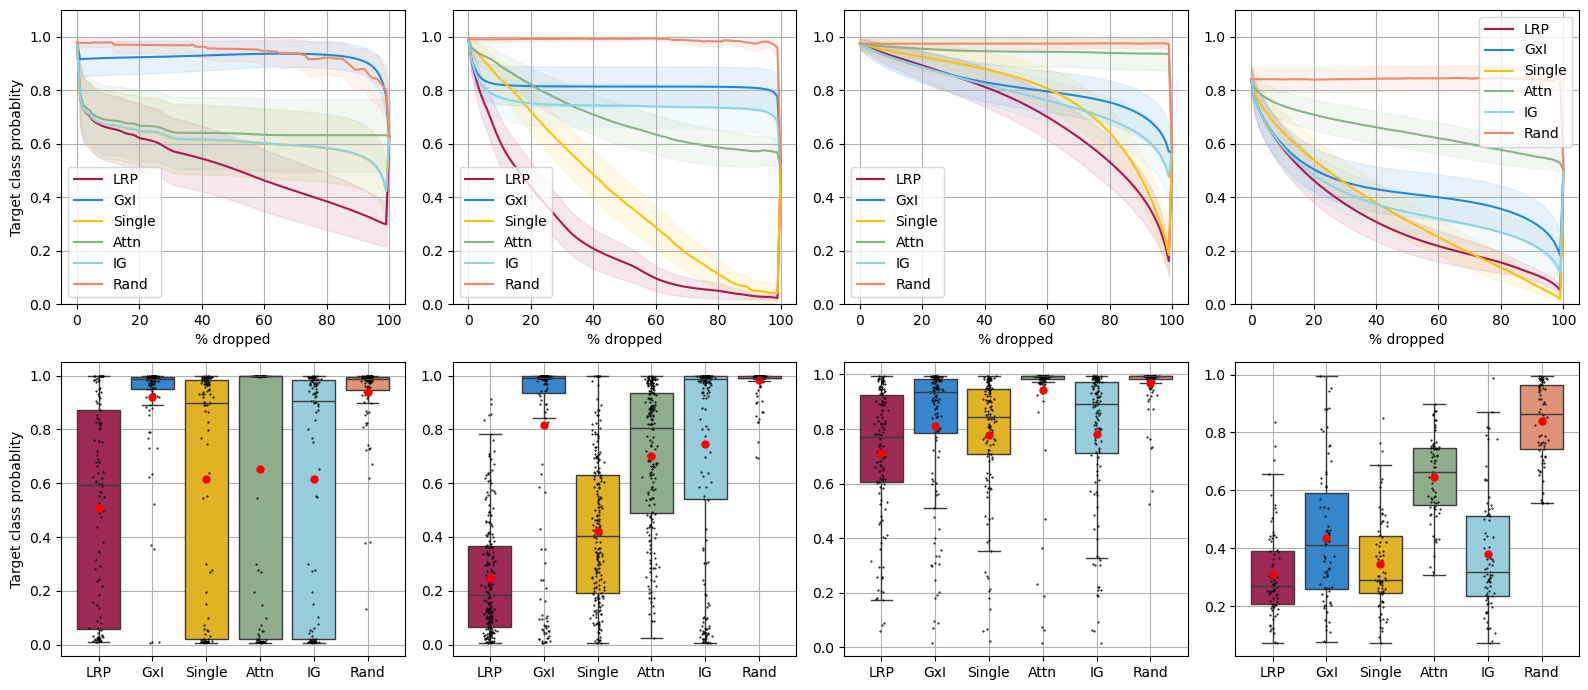

In [42]:
fig = plt.figure(figsize=(16, 7))
i = 0
for project, proj_label in zip(projects, project_label):
    i += 1
    plt.subplot(2, 4, i)
    if i == 1:
        ylabel = 'Target class probablity'
    else:
        ylabel = ''
    
    plot_perturbation_curve(probs_attnmil_drop[project],
                            flip_steps, skip_ids_attnmil[project], palette, '% dropped', ylabel, heatmap_types_label,
                            n_se=3, std=False)

    ax2 = plt.subplot(2, 4, 4 + i)
    
    plot_ave_prob_boxplots(ax2, probs_attnmil_drop[project], heatmap_types_label, palette, skip_ids_attnmil[project], 
                          ylabel, showfliers=True, significance_bars=False, verbose=False)


plt.tight_layout()
fig.savefig(os.path.join(fig_save_dir, f'attnmil_drop_colorblind.pdf')) 
fig.savefig(os.path.join(fig_save_dir, f'attnmil_drop_colorblind.svg')) 

# TransMIL DROP

/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/Users/mina/Documents/Codes/My_codes/Digital_Pathology/xMIL/visualization/utils.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


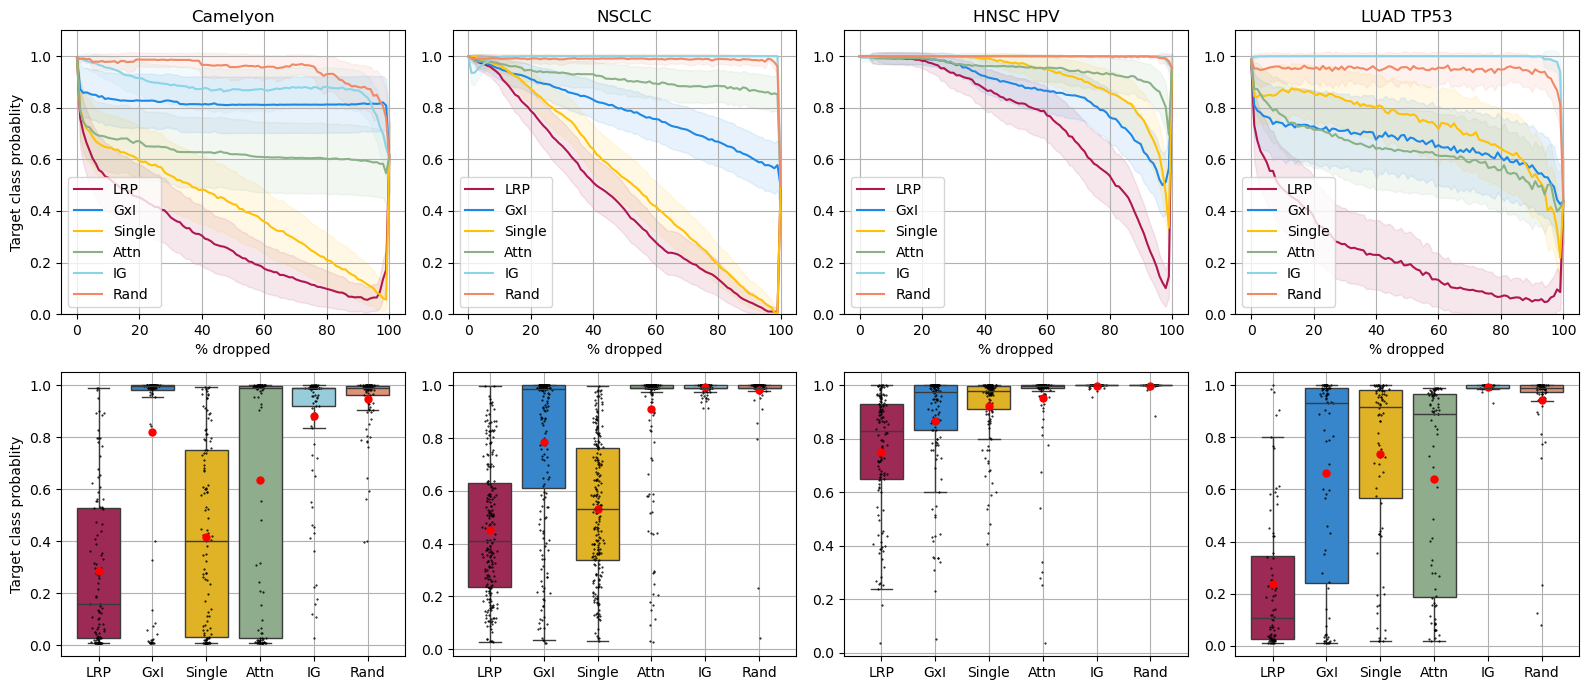

In [41]:
fig = plt.figure(figsize=(16, 7))
i = 0
for project, proj_label in zip(projects, project_label):
    i += 1
    plt.subplot(2, 4, i)
    if i == 1:
        ylabel = 'Target class probablity'
    else:
        ylabel = ''
    plot_perturbation_curve(probs_transmil_drop[project],
                            flip_steps, skip_ids_transmil[project], palette, '% dropped', ylabel, heatmap_types_label,
                            n_se=3, std=False)
    plt.title(proj_label)

    ax2 = plt.subplot(2, 4, 4 + i)
    
    plot_ave_prob_boxplots(ax2, probs_transmil_drop[project], heatmap_types_label, palette, skip_ids_transmil[project], 
                          ylabel, showfliers=True, significance_bars=False, verbose=False)


plt.tight_layout()
fig.savefig(os.path.join(fig_save_dir, f'transmil_drop_mean_colorblind.pdf')) 
fig.savefig(os.path.join(fig_save_dir, f'transmil_drop_mean_colorblind.svg')) 


# The rows of table of the table 2 of the manuscript

In [40]:
result = {heatmap_type: f'{heatmap_type}' for heatmap_type in ['Rand', 'Attn', 'Single', 'GxI', 'IG', 'LRP' ]}

attnmil_sig = {'Camelyon': ['', '', '', '', ''], 
               'NSCLC': ['', '', '', '', ''],
              'HNSC HPV': ['', '', '', '', ''],
              'LUAD TP53': ['', '', '', '', '']}

transmil_sig = {'Camelyon': ['', '', '', '', ''], 
               'NSCLC': ['', '', '', '', ''],
              'HNSC HPV': ['', '', '', '', ''],
              'LUAD TP53': ['', '', '', '', '']}


for proj_name, proj_label in zip(projects, project_label):
    aucs = compute_auc(probs_attnmil_drop[proj_name], skip_ids_attnmil[proj_name])
    for i, heatmap_type in enumerate(heatmap_types_label):
        
        aupc_ave = np.mean(aucs[i])
        aupc_std = np.std(aucs[i]) 
        
        
        this_str = ''
        this_str += f'{aupc_ave:.2f} ± {aupc_std:.2f}' 

        result[heatmap_type] += f' & {this_str}'
    

for proj_name, proj_label in zip(projects, project_label):
    aucs = compute_auc(probs_transmil_drop[proj_name], skip_ids_transmil[proj_name])
    for i, heatmap_type in enumerate(heatmap_types_label):

        aupc_ave = np.mean(aucs[i])
        aupc_std = np.std(aucs[i]) 
        
        this_str = ''

        this_str += f'{aupc_ave:.2f} ± {aupc_std:.2f}' 
        result[heatmap_type] += f' & {this_str}'

for heatmap_type, re in result.items():
    print(re + ' \\' + '\\')
    print()


Rand & 0.94 ± 0.13 & 0.98 ± 0.04 & 0.97 ± 0.07 & 0.84 ± 0.14 & 0.95 ± 0.11 & 0.98 ± 0.08 & 1.00 ± 0.01 & 0.94 ± 0.17 \\

Attn & 0.65 ± 0.46 & 0.70 ± 0.27 & 0.94 ± 0.18 & 0.65 ± 0.14 & 0.63 ± 0.45 & 0.91 ± 0.22 & 0.95 ± 0.15 & 0.64 ± 0.38 \\

Single & 0.61 ± 0.43 & 0.42 ± 0.26 & 0.78 ± 0.23 & 0.34 ± 0.16 & 0.42 ± 0.35 & 0.53 ± 0.26 & 0.92 ± 0.13 & 0.73 ± 0.33 \\

GxI & 0.92 ± 0.19 & 0.81 ± 0.35 & 0.81 ± 0.25 & 0.44 ± 0.23 & 0.82 ± 0.36 & 0.79 ± 0.30 & 0.87 ± 0.20 & 0.66 ± 0.40 \\

IG & 0.62 ± 0.44 & 0.75 ± 0.38 & 0.78 ± 0.25 & 0.38 ± 0.20 & 0.88 ± 0.23 & 0.99 ± 0.01 & 1.00 ± 0.00 & 0.99 ± 0.01 \\

LRP & 0.51 ± 0.38 & 0.25 ± 0.22 & 0.71 ± 0.24 & 0.31 ± 0.16 & 0.29 ± 0.30 & 0.45 ± 0.26 & 0.75 ± 0.23 & 0.24 ± 0.28 \\

